In [1]:
import os, sys
os.environ["MKL_THREADING_LAYER"]="GNU"
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from results_summary import load_all_models

Using cuDNN version 6021 on context None
Mapped name None to device cuda: GeForce GTX 1080 Ti (0000:84:00.0)
/nfs/nhome/live/kevinli/anaconda/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
dl_args = dict(npoint=300, nlayer=3, nneuron=30, init_log_lam=-3, points_std=0.0, keep_prob=1.0, init_weight_std=1.0, noise_std=0.05,
                    points_type="opt", log_lam_weights=-6, step_size=1e-2, mixture_kernel=False, 
               init_log_sigma=np.linspace(0,1,3), base=True,
                    niter=10000, ntrain=100, nvalid=100, patience=200, gpu_count=0, clip_score=False,
                curve_penalty=True)

others_args = dict( n_hiddens = [100]*2,
                    n_comps = 10,
                    n_layers = 5,
                    act_fun = 'tanh',
                    mode = 'random')

* `p` is the data object
* `m` is a dict of all models
* `l` is a dict of log liks
* `s` is a dict of samples (not for dkef)

In [ ]:
seed = 0
data_name = "redwine"
p, m, l, s = load_all_models(data_name, seed, dl_args, others_args, skip_theano=False)

In [5]:
d = m["dkef"]
d.estimate_normaliser(1000000)

estimating logZ: 100%|█████████████████████████████████████████| 1000/1000 [00:09<00:00, 108.24it/s]


19.284263280414848

In [6]:
d.q_estimate_normaliser(1000000)

estimating logZ: 100%|██████████████████████████████████████████| 1000/1000 [00:11<00:00, 89.97it/s]


19.284743987846326

In [7]:
d = m["dkef"]
r1 = d.get_logr(10000)
r2 = d.get_q_logr(10000)

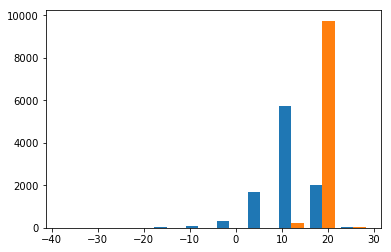

In [8]:
plt.hist([r1,r2]);